<a href="https://colab.research.google.com/github/Antoha2024/DiplomProductStar/blob/main/DS47_1_diabetes_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- train test split 70/30, stratified
- Random state  - 654321
- Метрика - F1 Macro
- Метрики на train и test не должны сильно отличаться

Гипотеза: Уровень глюкозы в крови оказывает влияние на вероятность заболевания диабетом.
Гипотеза нулевая (H0): Нет разницы в среднем значении уровня глюкозы у пациентов с диабетом и без диабета.
Альтернативная гипотеза (HА​): Существует значительная разница в среднем уровне глюкозы у пациентов с диабетом и без диабета. Дополинтельно провести сравнительный анализ количества значимых признаков на уровень глюкозы для пожилых людей и имеющим высокие показатели ИМТ для градации 1 и 2 типа сахарного диабета.
Методы проверки: t-тест, сравнение дисперсий.
- Работы команды:
https://colab.research.google.com/drive/1JbX1YjDkzM0qKy7I5EC4jHoqy75E5rAY?usp=sharing - Список по значимости влияния на целевую переменную.
https://colab.research.google.com/drive/1GE2EVPu5BuNlCPwcSOiIJsPPXpC4jp0o?usp=sharing#scrollTo=mwPuGptrEyw- - заполенение пробелов медианой и % пропусков.
- DS48 https://github.com/salfa-ru/ds41_50/blob/DS_48/DS48__diabetes_ds.ipynb

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
uploaded = files.upload()
df = pd.read_excel('diabetes_ds.xlsx')
#Переименование таргета, удаление в нём пропусков
df = df.rename(columns={r'Сахарный диабет (ЕСТЬ\НЕТ)' : 'Сахарный диабет'})
df = df.dropna(subset = ['Сахарный диабет']).reset_index(drop=True)
display(df.head(3), df.shape)

Saving diabetes_ds.xlsx to diabetes_ds.xlsx


,Номер,Перенес/ не перенес КВИ,Возраст,Пол,"Рост, см","Вес, кг",ИМТ 2 (ФОРМУЛА EXCEL),Эритроциты,Гемоглобин,Цветовой показатель,...,ИБС. ПИКС,ИБС. ПИКС (ЕСТЬ\НЕТ),"АГ, стадия",АГ (ЕСТЬ\НЕТ),"АГ, степень","АГ, риск","ХСН, стадии","ХСН, ФК","ХСН по фракции выброса, %",Сахарный диабет
0,390.0,1.0,68.0,2.0,158.0,86.0,34.449607,5.33,163.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,2.0,0,1.0
1,337.0,1.0,54.0,1.0,180.0,119.0,36.728395,5.01,130.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,35,1.0
2,160.0,1.0,68.0,1.0,174.0,110.0,36.332409,NaN,161.0,0.0,...,1.0,1.0,3.0,1.0,3.0,4.0,3.0,3.0,35,1.0


(478, 108)

In [3]:
df.info() #общая статистика

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Columns: 108 entries, Номер to Сахарный диабет
dtypes: float64(101), object(7)
memory usage: 403.4+ KB


In [4]:
#Показать список столбцов полностью
pd.set_option('display.max_rows', None)
print(df.dtypes)

Номер                                                                    float64
Перенес/ не перенес КВИ                                                  float64
Возраст                                                                  float64
Пол                                                                      float64
Рост, см                                                                 float64
Вес, кг                                                                  float64
ИМТ 2 (ФОРМУЛА EXCEL)                                                    float64
Эритроциты                                                               float64
Гемоглобин                                                               float64
Цветовой показатель                                                      float64
Лейкоциты                                                                float64
Лимфоциты%                                                               float64
ЛИМФОЦИТЫ, АБС (РАСЧЕТ ПО ФО

In [5]:
#Столбцы которые содержат пробелы
has_space = df.applymap(lambda x: isinstance(x, str) and ' ' in x).any()
space_columns = has_space[has_space].index
print(space_columns)

Index(['Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса (комментарий)', 'ХБП (исходн)'],
      dtype='object')


In [6]:
#Столбцы с типом object
obj_columns = df.columns[df.dtypes == 'object']
print(obj_columns)

Index(['BPB голеней',
       'Гипертрофия миокарда левого желудочка по ЭКГ или ЭХО-КГ (комментарий)',
       'Блокада НП Гисса', 'Блокада НП Гисса (комментарий)', 'AV- блокада',
       'ХБП (исходн)', 'ХСН по фракции выброса, %'],
      dtype='object')


Пустых значений: 0
Сахарный диабет
1.0    255
0.0    223
Name: count, dtype: int64


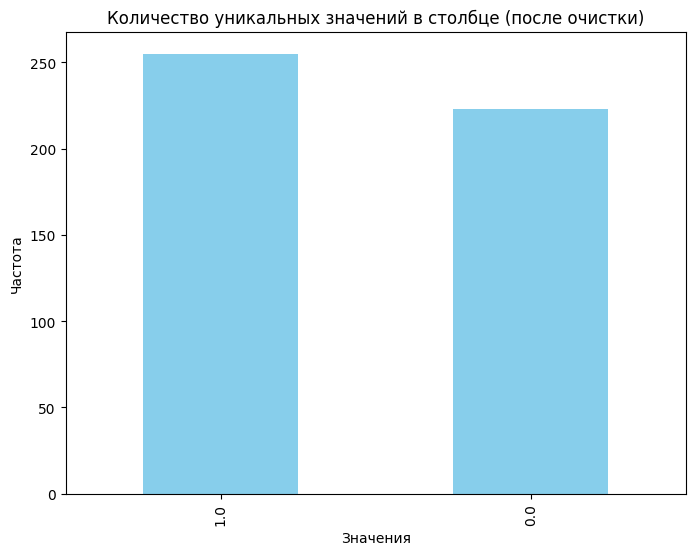

In [7]:
# Подсчет уникальных значений
value_counts = df['Сахарный диабет'].value_counts(dropna=False)

# Подсчет пустых значений
missing_count = df['Сахарный диабет'].isnull().sum()
print(f"Пустых значений: {missing_count}")

# Удаление строк с пустыми значениями
df_cleaned = df.dropna(subset=['Сахарный диабет'])

# Визуализация оставшихся данных
clean_value_counts = df_cleaned['Сахарный диабет'].value_counts()

# Печать очищенных данных
print(clean_value_counts)

# Построение графика
plt.figure(figsize=(8, 6))
clean_value_counts.plot(kind='bar', color='skyblue')
plt.title('Количество уникальных значений в столбце (после очистки)')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

Вывод: Оценивая представленную информацию, можно сказать, что в наборе данных наблюдается умеренный дисбаланс классов:

Класс 1.0 («есть сахарный диабет») присутствует в количестве 255 случаев.
Класс 0.0 («нет сахарного диабета») составляет 223 случая.
Соотношение классов составляет примерно:

$$\frac{223}{255} \approx 1.14$$

То есть класс 1.0 представлен немного чаще, но дисбаланс невелик. Такой уровень дисбаланса считается приемлемым и не требует специальных мер по восстановлению равновесия классов.

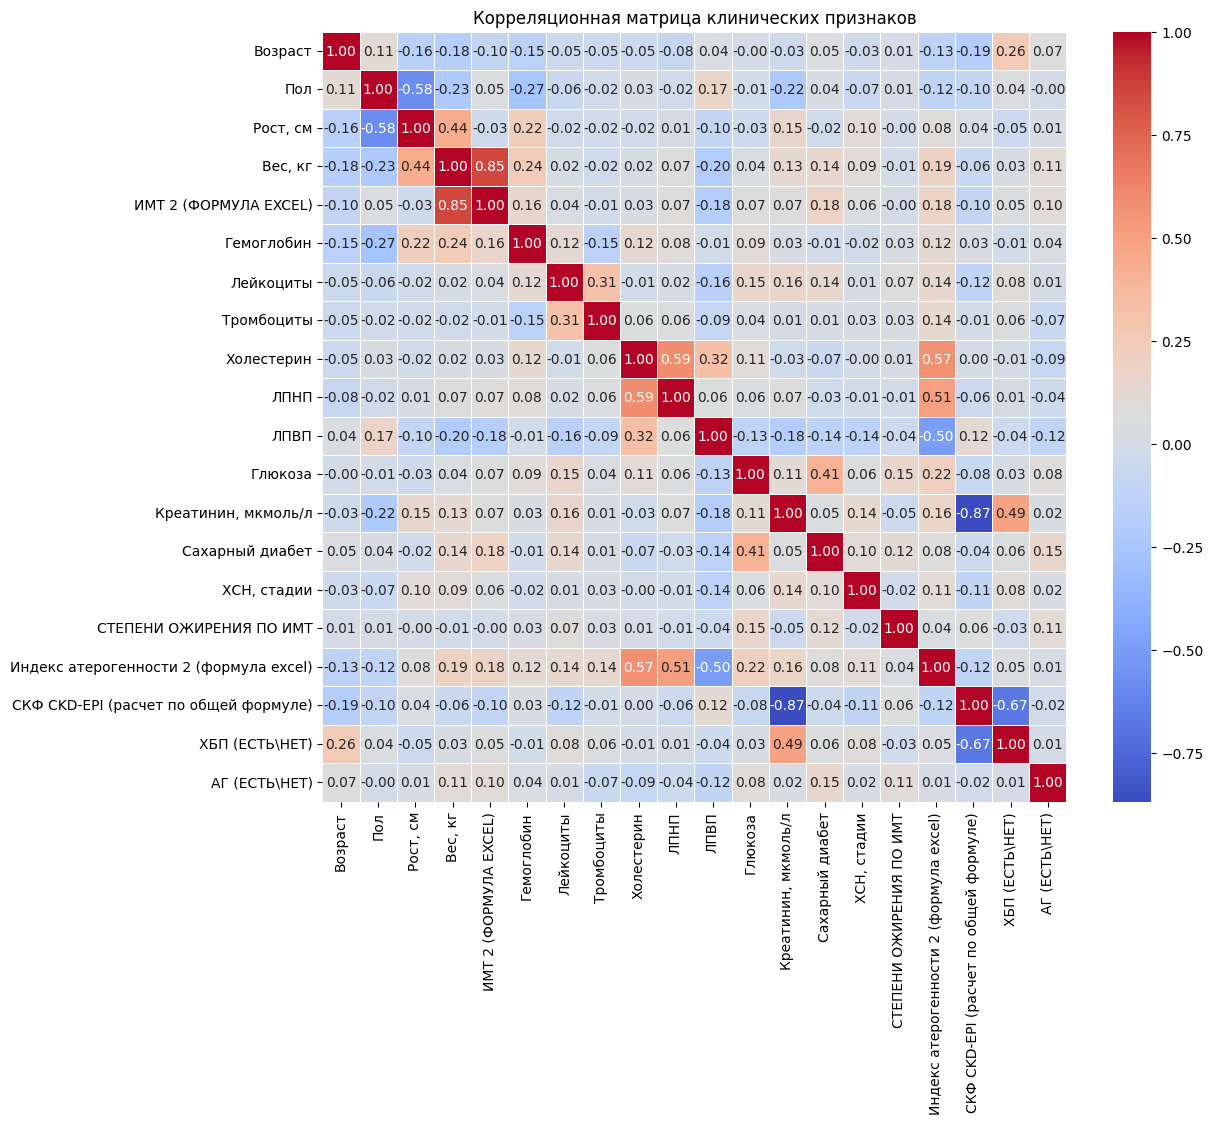

In [8]:
#расчет показателей группы пациентов с повышенной группой риска
clinical_cols = [
    "Возраст",
    "Пол",
    "Рост, см",
    "Вес, кг",
    "ИМТ 2 (ФОРМУЛА EXCEL)",
    "Гемоглобин",
    "Лейкоциты",
    "Тромбоциты",
    "Холестерин",
    "ЛПНП",
    "ЛПВП",
    "Глюкоза",
    "Креатинин, мкмоль/л",
    "Сахарный диабет",
    "ХСН, стадии",
    "СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ",
    "Индекс атерогенности 2 (формула excel)",
    "СКФ CKD-EPI (расчет по общей формуле)",
    "ХБП (ЕСТЬ\\НЕТ)",
    "АГ (ЕСТЬ\\НЕТ)"
]

# Остаемся только с нужными признаками
selected_df = df[clinical_cols].copy()

# Замещаем NaN-значения на медианы соответствующего столбца
for column in clinical_cols:
    if selected_df[column].dtype != 'O':  # Исключаем категориальные переменные
        median_value = selected_df[column].median()
        selected_df[column].fillna(median_value, inplace=True)

# Матрица корреляции
corr_matrix = selected_df.corr()

# Рисуем тепловую карту
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=.5)
plt.title("Корреляционная матрица клинических признаков")
plt.show()

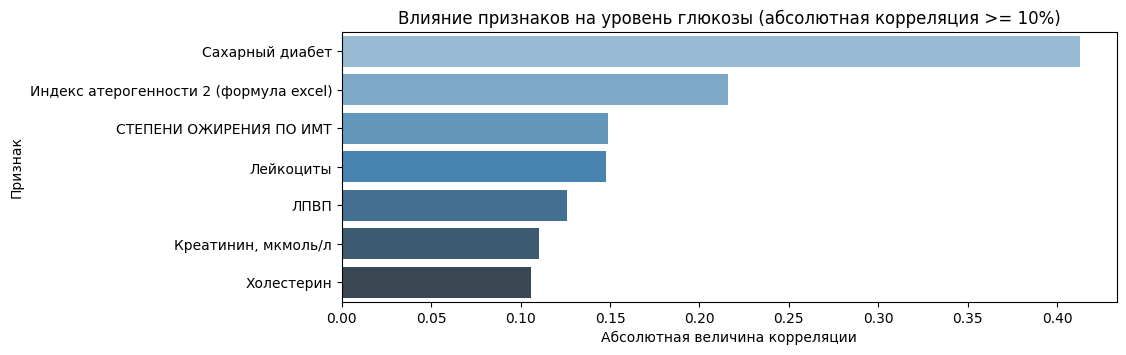

In [9]:
# Исходный список признаков
clinical_cols = [
    "Возраст",
    "Пол",
    "Рост, см",
    "Вес, кг",
    "ИМТ 2 (ФОРМУЛА EXCEL)",
    "Гемоглобин",
    "Лейкоциты",
    "Тромбоциты",
    "Холестерин",
    "ЛПНП",
    "ЛПВП",
    "Глюкоза",
    "Креатинин, мкмоль/л",
    "Сахарный диабет",
    "ХСН, стадии",
    "СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ",
    "Индекс атерогенности 2 (формула excel)",
    "СКФ CKD-EPI (расчет по общей формуле)",
    "ХБП (ЕСТЬ\\НЕТ)",
    "АГ (ЕСТЬ\\НЕТ)"
]

# Берём только интересующие нас признаки
selected_df = df[clinical_cols].copy()

# Замещаем пропуски медианой
for column in clinical_cols:
    if selected_df[column].dtype != 'O':
        median_value = selected_df[column].median()
        selected_df[column].fillna(median_value, inplace=True)

# Вычислим корреляцию
corr_matrix = selected_df.corr()

# Получим корреляцию по отношению к глюкозе
glucose_corr = corr_matrix['Глюкоза'].abs().sort_values(ascending=False)[1:]  # игнорируем само себя (корреляция 1.0)

# Отберём только признаки с абсолютной силой корреляции >= 10%
significant_features = glucose_corr[glucose_corr >= 0.1]

# Создание графика (горизонтальная гистограмма)
plt.figure(figsize=(10, len(significant_features)*0.5))  # Высота зависит от количества признаков
sns.barplot(x=significant_features.values, y=significant_features.index, palette="Blues_d")
plt.xlabel("Абсолютная величина корреляции")
plt.ylabel("Признак")
plt.title("Влияние признаков на уровень глюкозы (абсолютная корреляция >= 10%)")
plt.show()

Вывод: В списке по влиянию на показатели глюкозы попали пациенты с высокой степенью ожирения, группа пожилых пациентов не попала возможно из-за большого количества пропусков.

In [10]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler

# Исходный список признаков
clinical_cols = [
    "Возраст",
    "Пол",
    "Рост, см",
    "Вес, кг",
    "ИМТ 2 (ФОРМУЛА EXCEL)",
    "Гемоглобин",
    "Лейкоциты",
    "Тромбоциты",
    "Холестерин",
    "ЛПНП",
    "ЛПВП",
    "Глюкоза",
    "Креатинин, мкмоль/л",
    "Сахарный диабет",
    "ХСН, стадии",
    "СТЕПЕНИ ОЖИРЕНИЯ ПО ИМТ",
    "Индекс атерогенности 2 (формула excel)",
    "СКФ CKD-EPI (расчет по общей формуле)",
    "ХБП (ЕСТЬ\\НЕТ)",
    "АГ (ЕСТЬ\\НЕТ)"
]

# Берём только интересующие нас признаки
selected_df = df[clinical_cols].copy()

# Замещаем пропуски медианой
for column in clinical_cols:
    if selected_df[column].dtype != 'O':
        median_value = selected_df[column].median()
        selected_df[column].fillna(median_value, inplace=True)

# Целевая переменная — наличие сахарного диабета
target_col = 'Сахарный диабет'
X = selected_df.drop(target_col, axis=1)
y = selected_df[target_col]

# Разделение на тренировочные и тестовые выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=654321)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

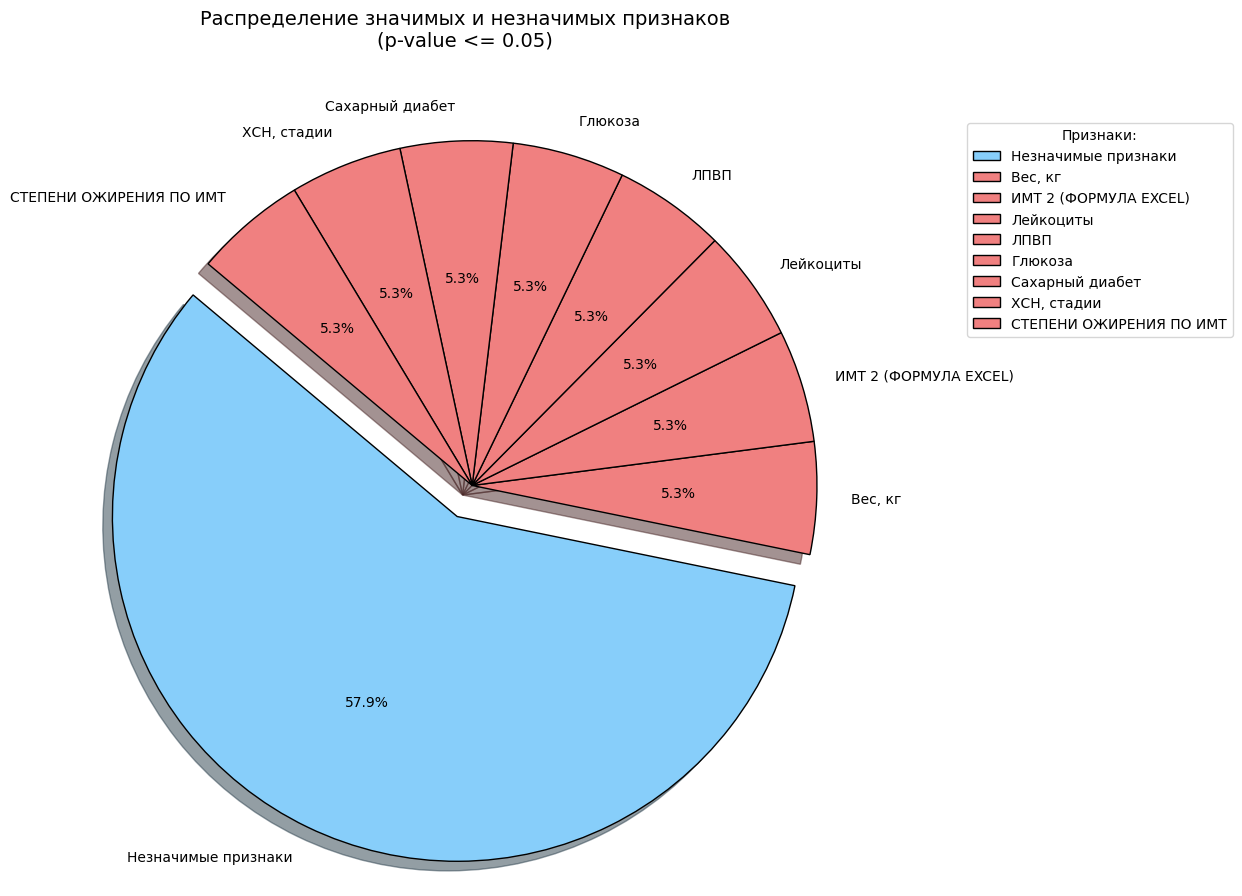

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Функция для проверки статистической значимости
def check_statistical_significance(df, group_col, feature_col):
    groups = df.groupby(group_col)
    samples = []
    for _, grp in groups:
        samples.append(grp[feature_col])

    if len(samples) == 2:
        return ttest_ind(*samples, equal_var=False)
    else:
        return f_oneway(*samples)

# Предположим, у вас есть dataset selected_df и список клинических признаков clinical_cols,
# включая целевой признак target_col.

# Получаем статистику по каждому признаку
stat_results = {}
for col in clinical_cols[:-1]:  # Исключаем целевую переменную
    result = check_statistical_significance(selected_df, target_col, col)
    stat_results[col] = {'statistic': result.statistic, 'p-value': result.pvalue}

# Преобразуем в DataFrame
results_df = pd.DataFrame(stat_results).transpose()

# Подсчет количества значимых и незначимых признаков
sig_features = results_df.query("`p-value` <= 0.05").index.tolist()  # Список значимых признаков
non_sig_count = len(clinical_cols[:-1]) - len(sig_features)

# Создание структуры для группировки результатов
if sig_features:
    significant_sizes = [1]*len(sig_features)  # Размер каждой отдельной секции равняется единице
else:
    significant_sizes = []  # Если нет значимых признаков, массив пуст

# Общая структура для графика
total_sizes = [non_sig_count] + significant_sizes
labels = ['Незначимые признаки'] + sig_features
colors = ['lightskyblue'] + ['lightcoral']*len(significant_sizes)
explode = [0.1] + [0]*len(significant_sizes)  # Выделение первой группы (незначимых признаков)

# Построение общей круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    total_sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140,
    wedgeprops={
        'linewidth': 1,           # минимальная ширина линии
        'edgecolor': 'black',    # белый цвет внешней линии (для минимальной видимости)
        'antialiased': True       # сглаживание линии для лучшего внешнего вида
    }
)
ax.axis('equal')
ax.set_title('Распределение значимых и незначимых признаков\n(p-value <= 0.05)', pad=50, fontsize=14)
plt.legend(title="Признаки:", loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [12]:
# Обучаем модель Random Forest
rf_model = RandomForestClassifier(random_state=654321)
rf_model.fit(X_train_scaled, y_train)

# Прогноз на тестовом наборе
y_pred = rf_model.predict(X_test_scaled)

# Отчёт по классификации
report = classification_report(y_test, y_pred)
print(report)

# F1-macro score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-macro Score: {macro_f1:.4f}")

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73        67
         1.0       0.76      0.78      0.77        77

    accuracy                           0.75       144
   macro avg       0.75      0.75      0.75       144
weighted avg       0.75      0.75      0.75       144

F1-macro Score: 0.7483
